In [1]:
import pyclesperanto_prototype as cle
import beetlesafari as bs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cle.select_device('RTX')

C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'maximum' keyword arguments has been changed to 'max'. In the future this will raise an exception

  warn(
C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'minimum' keyword arguments has been changed to 'min'. In the future this will raise an exception

  warn(


<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

Load a [ClearControl](https://github.com/ClearControl) dataset.

In [2]:
cc_dataset = bs.ClearControlDataset('C:/structure/data/2019-12-17-16-54-37-81-Lund_Tribolium_nGFP_TMR/')

print("Duration in seconds:", cc_dataset.get_duration_in_seconds())

print("Duration in hours:", bs.seconds_to_hours(cc_dataset.get_duration_in_seconds()))

Duration in seconds: 607654.0077
Duration in hours: 168.79277991666666


Visualization of time points (maximum projections)

Text(0.5, 0.98, '14 hours of Tribolium embryo development')

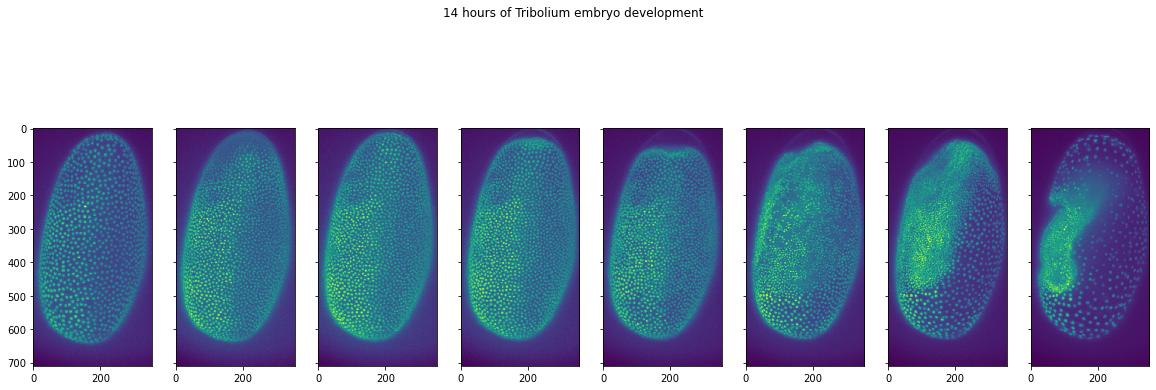

In [3]:
fig, axs = plt.subplots(1, 8, figsize=(20, 7), sharey=True)

data = []

# visualize the dataset at the beginning of every day
for i, d in enumerate(range(6, 22, 2)):
    image = cc_dataset.get_resampled_image(time_in_seconds=bs.hours_to_seconds(d))
    data.append(image)
    cle.imshow(image, plot=axs[i])

fig.suptitle('14 hours of Tribolium embryo development')

Segmentation

Segmentation took 0.5907657146453857 s


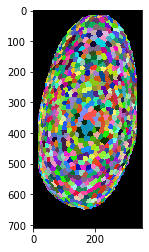

In [4]:
cells, spots = bs.segmentation(data[0])
cle.imshow(cells, labels=True)

Centroid extraction

In [5]:
centroids = cle.centroids_of_labels(cells)
print(centroids.shape)
print(np.asarray(centroids).T)

(3, 1045)
[[258.92105   37.        17.052631]
 [ 86.       617.        17.      ]
 [296.31033   89.206894  17.189655]
 ...
 [185.16199  382.8608   153.66054 ]
 [170.56447  395.43542  153.75455 ]
 [175.24144  417.35052  153.08353 ]]


In [6]:
df = pd.DataFrame(np.asarray(centroids).T, columns=["X", "Y", "Z"])
df

,X,Y,Z
0,258.921051,37.000000,17.052631
1,86.000000,617.000000,17.000000
2,296.310333,89.206894,17.189655
3,99.222221,114.777779,17.000000
4,219.500000,29.200001,17.000000
...,...,...,...
1040,181.896042,368.188477,153.825760
1041,166.165619,380.224304,153.450821
1042,185.161987,382.860809,153.660538
1043,170.564468,395.435425,153.754547


Save centroids to csv_files - for each frame

Segmentation took 0.4815788269042969 s


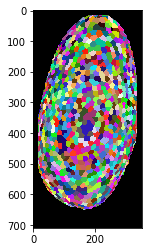

(3, 1045)
Segmentation took 0.4917929172515869 s


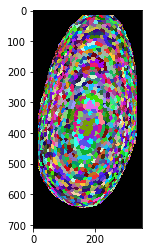

(3, 2026)
Segmentation took 0.5008316040039062 s


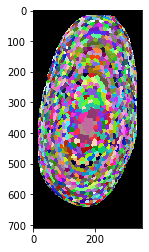

(3, 1966)
Segmentation took 0.4945816993713379 s


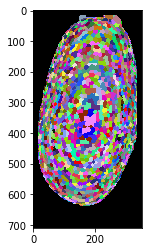

(3, 1979)
Segmentation took 0.5106439590454102 s


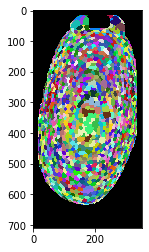

(3, 1940)
Segmentation took 0.5164997577667236 s


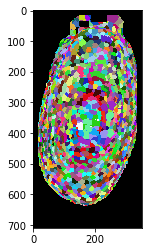

(3, 2046)
Segmentation took 0.4818847179412842 s


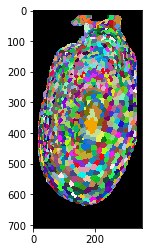

(3, 2162)
Segmentation took 0.5069901943206787 s


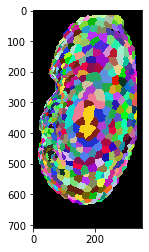

(3, 1466)


In [7]:
for i, d in enumerate(data):
    cells, spots = bs.segmentation(d)
    cle.imshow(cells, labels=True)
    centroids = cle.centroids_of_labels(cells)
    print(centroids.shape)
    df = pd.DataFrame(np.asarray(centroids).T, columns=["X", "Y", "Z"])
    df.to_csv("centroids_{}.csv".format(i))

Load data and visualize

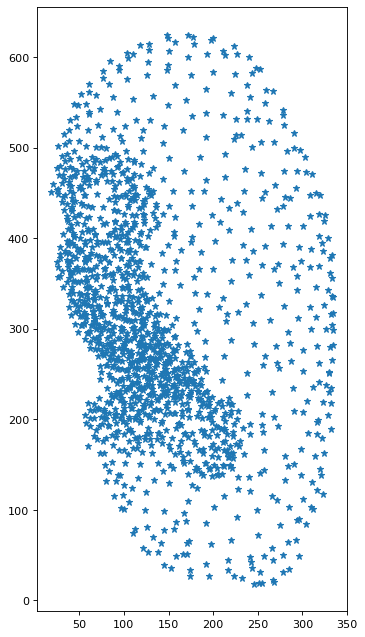

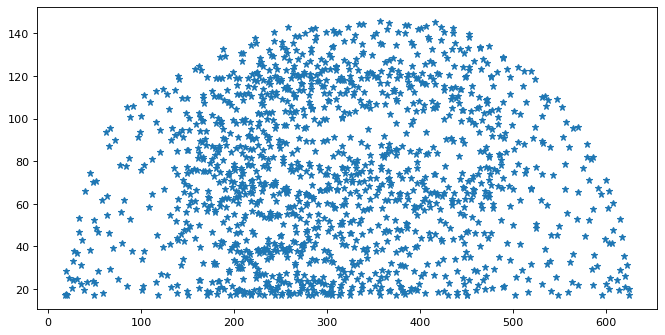

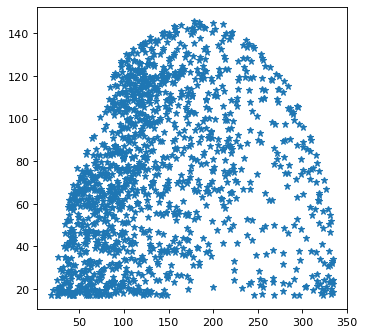

In [8]:
df=pd.read_csv('centroids_7.csv')

plt.figure(figsize=(5, 10), dpi=80)
plt.plot(df['X'], df['Y'], '*')

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df['Y'], df['Z'], '*')

plt.figure(figsize=(5, 5), dpi=80)
plt.plot(df['X'], df['Z'], '*')
